In [1]:
import numpy as np
import matplotlib.pyplot as plt

Latex commands
https://www.bu.edu/math/files/2013/08/LongTeX1.pdf


In [2]:
#LINEAR ALGEBRA
#angle between two vectors (X,Y) is the inverse cosine of dot product divided by the magnitude of 
#The magnitude of a vector in NumPy, also known as its Euclidean norm or L2 norm, can be calculated using numpy.
#linalg.norm(). This function computes the norm of an array. When applied to a 1-D array (representing a vector), 
#it calculates the magnitude by taking the square root of the sum of the squares of its elements.
def lin_vect_ang (X,Y):
    dot_XY = np.dot(X,Y)
    mag_X = np.linalg.norm(X)
    mag_Y = np.linalg.norm(Y)
    angle = np.arccos((dot_XY)/(mag_X*mag_Y))
    return (angle)

# Test run
X1 = np.array([1,2,3])
Y1 = np.array([1,2,3])

ang_test = lin_vect_ang(X1,Y1)
print (type(X1))
print (ang_test) #fun

<class 'numpy.ndarray'>
0.0


In [3]:
#Machine learning
#Mean Square Error


X2 = np.array([[1,2,3], [2,3,4]])
print(X2)
W = np.array([3,4,5])#one 
W1 = np.atleast_2d(W).T
b = 2
print(W1)

Out = np.dot(X2,W1) +b
print(Out)

[[1 2 3]
 [2 3 4]]
[[3]
 [4]
 [5]]
[[28]
 [40]]


***
$\mathbf{\text{For simple sine wave definition below:}}$<br>

&emsp;&emsp;${f} = 2{\pi\omega}$ <br>

&emsp;&emsp;${\omega} = {\frac{2\pi}{T}}$

$\mathbf{\text{This is radians}}$<br>
&emsp;&emsp;${\omega}t $


***

Text(0, 0.5, 'V')

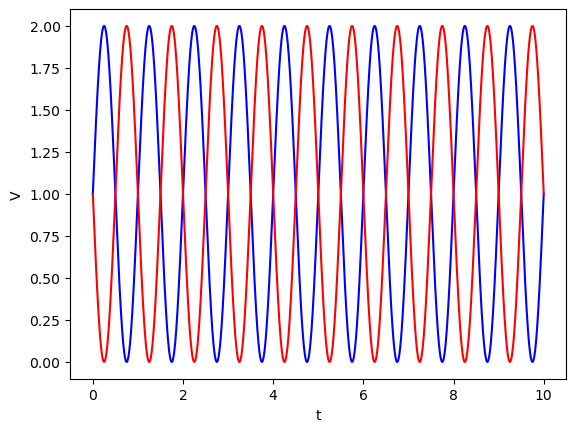

In [4]:
#simple Sine wave
#creates matrix for for time and amplitude
#amp = amplitude in V, freq = frequency in Hz, phase = phase in degrees, samp = samples/s, 

def simp_sine (dc_bias, amp, freq, phase, samp_rate, time):
    period = 1/freq
    ang_freq = (2*np.pi)*freq #
    phs_rad = phase * (np.pi/180)
    samples = samp_rate * time
    #time values
    t = np.linspace(0,time,samples )
    y = dc_bias + amp * np.sin((ang_freq*t)+phs_rad)
    return(y,t)

###########################
y1,t1 = simp_sine(1,1,1,0, 1000, 10)
y2,t2 = simp_sine(1,1,1,180, 1000, 10)

#plt.plot(t, y, marker='x')
plt.plot(t1, y1,color = 'blue')
plt.plot(t2, y2,color = 'red')
plt.xlabel('t')
plt.ylabel('V')
    

***
$\mathbf{\text{Implement wave as complex number using Euler equation}}$<br>

$\mathbf{\text{Euler's equation}}$<br>
&emsp;&emsp;$e^{\imath{\omega}t} = \cos({\omega}t) + \imath\sin({\omega}t) $
***

In [5]:
def comp_wave (dc_bias, amp, freq, phase, samp_rate, time):
    period = 1/freq
    ang_freq = (2*np.pi)*freq #
    phs_rad = phase * (np.pi/180)
    
    samples = samp_rate*time
    #time values
    t = np.linspace(0,time,samples )
    r_part = dc_bias + amp * np.cos((ang_freq*t)+phs_rad)
    i_part = (dc_bias + amp * np.sin((ang_freq*t)+phs_rad))*1j
    comp_array = r_part + i_part
    return(comp_array,t)

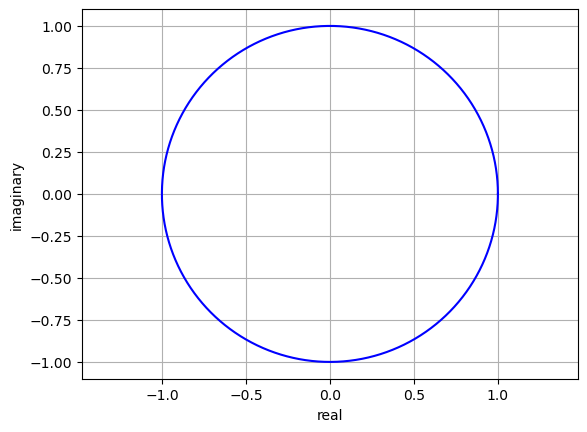

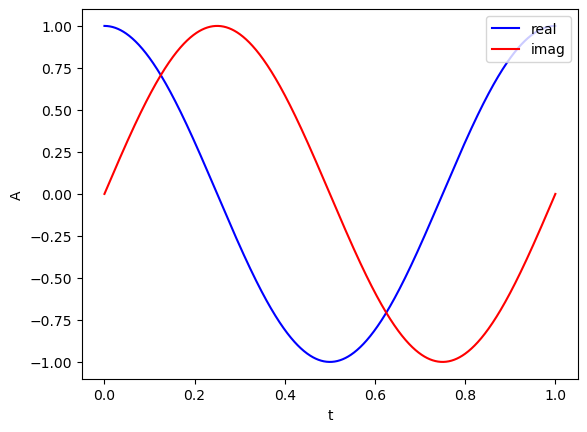

In [6]:
###########################
comp,t1 = comp_wave(0,1,1,0, 1000, 1)
# Print the first 2 rows
#print(comp)

#plt.plot(t, y, marker='x')
plt.figure()
# Set the aspect ratio to 'equal' so it comes out as a circle
plt.axis('equal')
plt.xlabel('real')
plt.ylabel('imaginary')
plt.grid()
plt.plot(comp.real, comp.imag,color = 'blue', )
#plt.plot(t2, y2,color = 'red')

plt.show()

plt.figure()
plt.plot(t1, comp.real,color = 'blue',label='real')
plt.plot(t1, comp.imag,color = 'red', label = 'imag')
plt.legend(loc='upper right')
plt.xlabel('t')
plt.ylabel('A')
    
plt.show()


***
$\mathbf{\text{Attempt to implement a MZM from 6.9 of Keith Williams book:}}$<br>

$\mathbf{\text{Optical Input field into fiber:}}$<br>

$\mathbf{E_{in}(t) = \sqrt{\frac{2P_{o}}{A}}\Bigg(\frac{\mu}{\epsilon}\Bigg)^\frac{1}{4} e^{\imath{\omega}t}}$

$\mathbf{\text{Like in book, assume lossless 50/50 couplers eqn 6.2:}}$<br>
$\mathbf{\text{Coupler transfer function:}}$<br>

$\begin{vmatrix} {E_{out,1}} \\ {E_{out,2}} \end{vmatrix} = \frac{1}{\sqrt{2}}\begin{vmatrix} 1 & i  \\ i & 1\end{vmatrix} \begin{vmatrix} {E_{in,1}} \\ {E_{in,2}} \end{vmatrix}$

$\mathbf{\text{MZM phase matrix:}}$

$\begin{vmatrix} \sqrt{a_{1}}F(\phi_{1}) & 0  \\ 0 & \sqrt{a_{2}}F(\phi_{2})\end{vmatrix}$

$\mathbf{\text{Here a1 = a2 and F is the phase dependence while in the MZM}}$<br>
$\mathbf{\text{We take a single arm drive MZM }}$<br>

$\sqrt{l_{mzm}}\begin{vmatrix} e^{i\phi(t)} & 0  \\ 0 & 1\end{vmatrix}$

$\mathbf{\text{Put entire Transfer function together, and send light in one arm}}$<br>

$\begin{vmatrix} {E_{out,1}} \\ {E_{out,2}} \end{vmatrix} = \frac{\sqrt{l_{mzm}}}{2}
\begin{vmatrix} 1 & i  \\ i & 1\end{vmatrix}
\begin{vmatrix} e^{i\phi(t)} & 0  \\ 0 & 1 \end{vmatrix}
\begin{vmatrix} 1 & i  \\ i & 1\end{vmatrix}
\begin{vmatrix} {E_{in,1}} \\ 0 \end{vmatrix}
$

$\phi(t) \text{ is the phase modulation in one arm and } \Omega \text{ is the modulation frequency}$

$\phi(t) = \phi_{dc} + \phi_{rf}\sin(\Omega t)$
***

[[0.70710678+0.j         0.        +0.70710678j]
 [0.        +0.70710678j 0.70710678+0.j        ]]
Combined Ein
[[0.99195481+0.12659245j 0.9819287 +0.18925124j]
 [0.        +0.j         0.        +0.j        ]]
Eout after coupler
[[ 0.70141797+0.08951438j  0.69432844+0.13382084j]
 [-0.08951438+0.70141797j -0.13382084+0.69432844j]]
(2, 100)
Eout1 after coupler
[0.70141797+0.08951438j 0.69432844+0.13382084j]
(100,)
Eout2 after coupler
[-0.08951438+0.70141797j -0.13382084+0.69432844j]
(100,)
one coupler


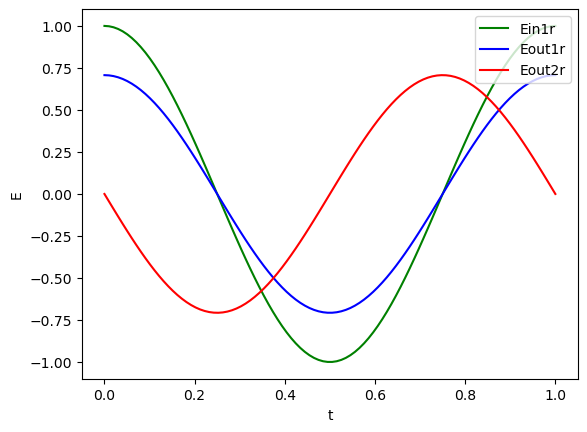

[[0.70710678+0.j         0.        +0.70710678j]
 [0.        +0.70710678j 0.70710678+0.j        ]]
two couplers, Eout1, Pretty fun it comes out the other side. 90 degree pahse shift 
[ 0.        +0.j         -0.12659245+0.99195481j]


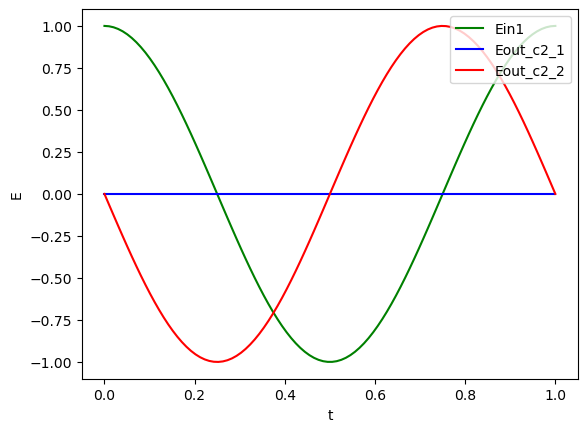

In [8]:
#start with waves and just a coupler 
#def comp_wave (dc_bias, amp, freq, phase, samp_rate, time):
Ein1,t1 = comp_wave(0,1,1,0, 100, 1)
coupler = 1/np.sqrt(2)*np.array([[1, 1j], [1j, 1]])
print (coupler)


#combine Ein with array of zeros becasue we are not using the second input
Ein2 = np.zeros(Ein1.shape[0]) #could also be just shape, beacuse this is a one dimensional array
Ein = np.vstack ((Ein1, Ein2))
print("Combined Ein")
print(Ein[0:2, 2:4]) # Slices index 2 and 3 from both rows 0 and 1: Syntax: array[start:end:step], where start is the beginning index (inclusive), end is the stopping index (exclusive), and step is the increment.
Eout = np.dot(coupler, Ein)
Eout_c1_1= (Eout[0])
Eout_c1_2= (Eout[1])
################################
print("Eout after coupler")
print(Eout[0:2, 2:4])
print(Eout.shape)
#
print("Eout1 after coupler")
print(Eout_c1_1[2:4])
print(Eout_c1_1.shape)
#
print("Eout2 after coupler")
print(Eout_c1_2[2:4])
print(Eout_c1_2.shape)

print ("one coupler")
plt.figure()
plt.plot(t1, (Ein1.real),color = 'green',label='Ein1r')
#plt.plot(t1, (Ein1.imag),color = 'blue',label='Ein1')

plt.plot(t1, (Eout_c1_1.real),color = 'blue',label='Eout1r')
plt.plot(t1, (Eout_c1_2.real),color = 'red',label='Eout2r')

#plt.plot(t1, np.abs(Eout_c1_2), color = 'red', label = 'Eout2')
plt.legend(loc='upper right')
plt.xlabel('t')
plt.ylabel('E')
    
plt.show()
print (coupler)

Eout1 = np.dot(coupler, Eout)
print ("two couplers, Eout1, Pretty fun it comes out the other side. 90 degree pahse shift ")
print(Eout1[0:2, 2]) 
Eout_c2_1= (Eout1[0])
Eout_c2_2= (Eout1[1])


plt.figure()
plt.plot(t1, Ein1.real,color = 'green',label='Ein1')
plt.plot(t1, Eout_c2_1.real,color = 'blue',label='Eout_c2_1')
plt.plot(t1, Eout_c2_2.real,color = 'red', label = 'Eout_c2_2')
#plt.plot(t1, Eout_c2_2.real,color = 'purple', label = 'Eout2i')

plt.legend(loc='upper right')
plt.xlabel('t')
plt.ylabel('E')
    
plt.show()

       

In [20]:

arr1 = np.array([[1, 2, 3], [4, 5, 6]]) # Shape (2, 3)
arr2 = np.array([10, 20, 30])         # Shape (3,)
arr4 = np.array([[10],[20],[30]])
arr5 = np.transpose(arr2)
print (arr5)

#3d array
arr3 = np.array([[[ 1,  2,  3],[ 4,  5,  6]],[[ 7,  8,  9],[10, 11, 12]]])
print ("1d 2d straight multiply by element *")
result = arr1 * arr2
print(result)
print ("1d 2d dot product*")
result1 = np.dot(arr1,arr2)
print(result1)
print (arr1.shape)
print (arr2.shape)
print (arr3.shape)
print (arr4.shape)
print (arr2)
print (arr4)

print ("straight multiply *")
result2 = arr3 * arr2
print(result2)
print ("dot product")
result3 = np.dot(arr3,arr2)
print(result3)
print (result3.shape)

print ("dot product")
result4 = np.dot(arr3,arr4)
print(result4)
print (result4.shape)

[10 20 30]
1d 2d straight multiply by element *
[[ 10  40  90]
 [ 40 100 180]]
1d 2d dot product*
[140 320]
(2, 3)
(3,)
(2, 2, 3)
(3, 1)
[10 20 30]
[[10]
 [20]
 [30]]
straight multiply *
[[[ 10  40  90]
  [ 40 100 180]]

 [[ 70 160 270]
  [100 220 360]]]
dot product
[[140 320]
 [500 680]]
(2, 2)
dot product
[[[140]
  [320]]

 [[500]
  [680]]]
(2, 2, 1)


In [32]:
#build 2x2x5 multidimesional array arange (start stop, step def =1)
tarr1 = np.arange(1, 5, 1)
tarr2 = np.arange(9, 13, 1)
tarr3 = np.arange(3, 7, 1)
tarr4 = np.arange(4, 8, 1)

print (tarr1)
tarr1_r = tarr1.reshape(1, 1, 4)
print (tarr1_r)

#vst = np.vstack((tarr1, tarr2,tarr3, tarr4))
vst_t= np.transpose(vst)
print (vst)
print (vst.shape)
print (vst_t)
print (vst_t.shape)
vstrs = vst_t.reshape(4, 2, 2)
print (vstrs)

[1 2 3 4]
[[[1 2 3 4]]]
[[ 1  2  3  4]
 [ 9 10 11 12]
 [ 3  4  5  6]
 [ 4  5  6  7]]
(4, 4)
[[ 1  9  3  4]
 [ 2 10  4  5]
 [ 3 11  5  6]
 [ 4 12  6  7]]
(4, 4)
[[[ 1  9]
  [ 3  4]]

 [[ 2 10]
  [ 4  5]]

 [[ 3 11]
  [ 5  6]]

 [[ 4 12]
  [ 6  7]]]


In [ ]:
#Build multidimensional phase shift array

def MZM_wave (dc_bias, amp, freq, phase, samp_rate, time):
    period = 1/freq
    ang_freq = (2*np.pi)*freq #
    phs_rad = phase * (np.pi/180)
    
    samples = samp_rate*time
    #time values
    t = np.linspace(0,time,samples )
    r_part = dc_bias + amp * np.cos((ang_freq*t)+phs_rad)
    i_part = (dc_bias + amp * np.sin((ang_freq*t)+phs_rad))*1j
    comp_array = r_part + i_part
    return(comp_array,t)

In [ ]:
test = np.dot(coupler, coupler)
print (test)